In [17]:
import sys

sys.path.append('./utils/')
import numpy as np
import cv2
import gdal
import json
import loadcoraldata_utils as coralutils
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

<IPython.core.display.Javascript object>


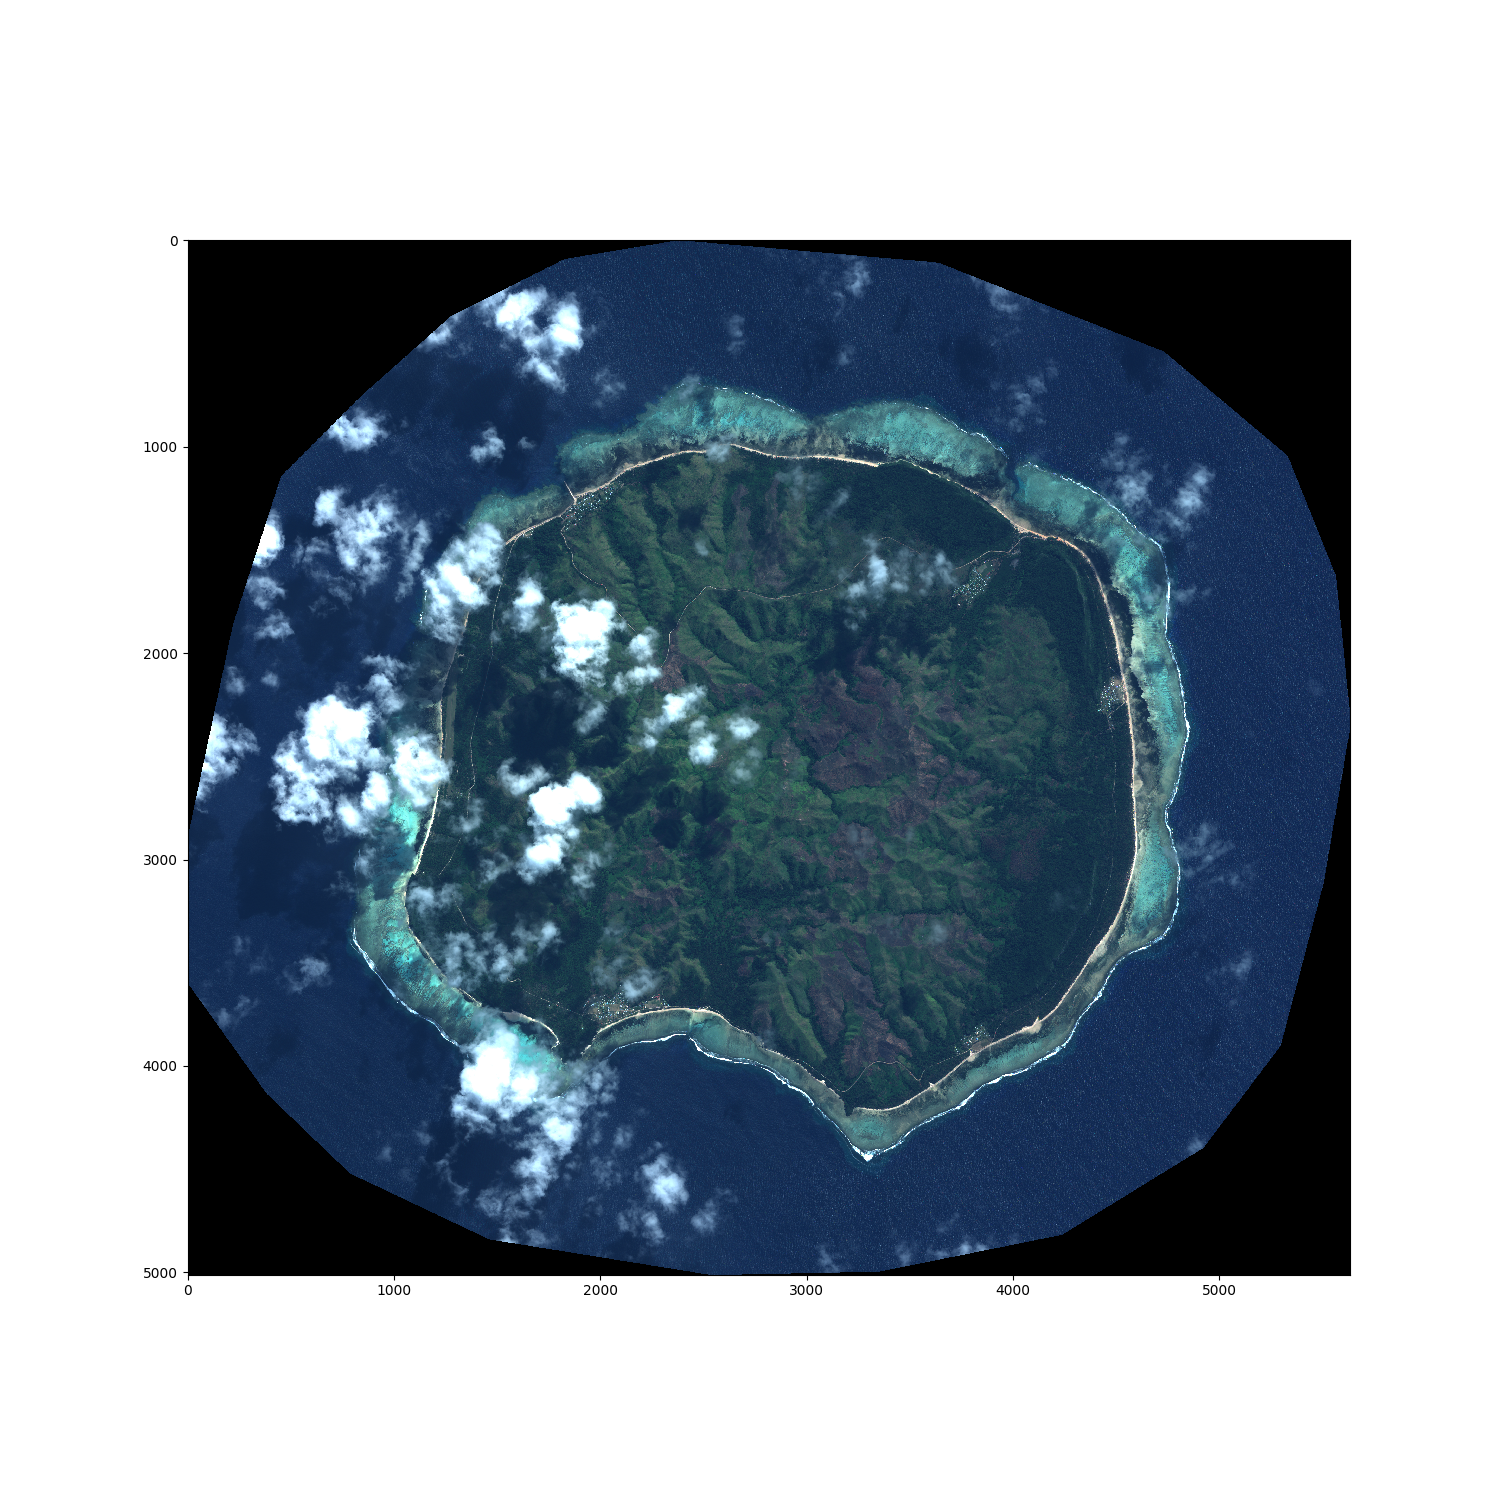

<IPython.core.display.Javascript object>


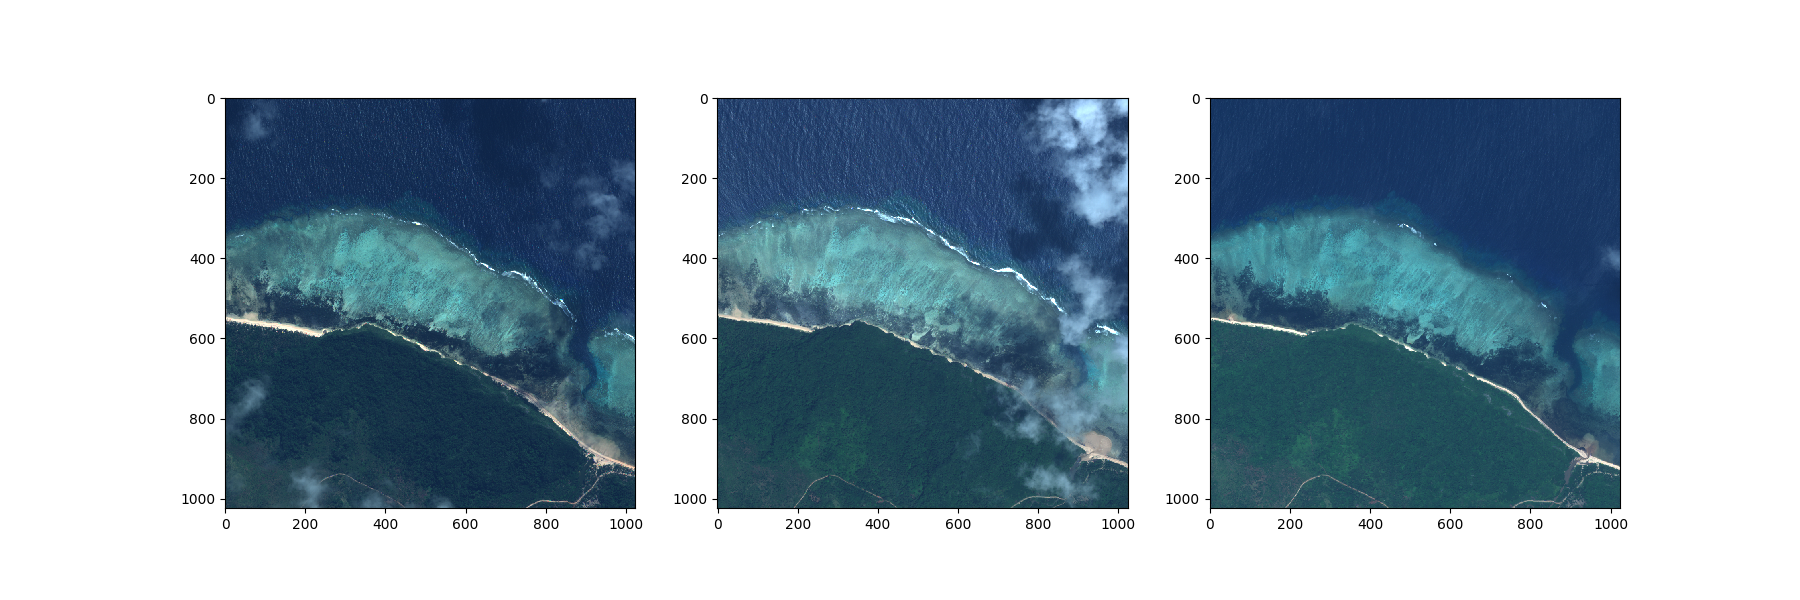

In [24]:
Cicia1 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_001.TIF'
Cicia2 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_002.TIF'
Cicia3 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_003.TIF'
Cicia_original = '/home/shared/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Satellite_image_mosaic_KSLOF.tif'
Cicia_truthpath = '/home/shared/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Habitat_classes_raster_KSLOF.tif'

jsonpath = './utils/CoralClasses.json'

with open(jsonpath) as json_file:
    json_data = json.load(json_file)

Cicia1 = coralutils.CoralData(Cicia1, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Cicia2 = coralutils.CoralData(Cicia2, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Cicia3 = coralutils.CoralData(Cicia3, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")

xstart = 3100
xlen = 1024
ystart = 500
ylen = 1024

fig = plt.figure(1, figsize=(15,15))
Cicia_RGB = 255/200*np.rollaxis(np.asarray([Cicia1.image[:,:,4], Cicia1.image[:,:,2], Cicia1.image[:,:,1]]),0,3)
Cicia_RGB[Cicia_RGB > 255] = 255
Cicia_RGB = np.asarray(Cicia_RGB, dtype=np.uint8)
plt.imshow(Cicia_RGB)

fig = plt.figure(2,figsize=(18,6))
Testimage1 = Cicia1.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage1_RGB = 255/200*np.rollaxis(np.asarray([Testimage1[:,:,4], Testimage1[:,:,2], Testimage1[:,:,1]]),0,3)
Testimage1_RGB[Testimage1_RGB > 255] = 255
Testimage1_RGB = np.asarray(Testimage1_RGB, dtype=np.uint8)
ax = plt.subplot(131)
ax.imshow(Testimage1_RGB)

Testimage2 = Cicia2.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage2_RGB = 255/200*np.rollaxis(np.asarray([Testimage2[:,:,4], Testimage2[:,:,2], Testimage2[:,:,1]]),0,3)
Testimage2_RGB[Testimage2_RGB > 255] = 255
Testimage2_RGB = np.asarray(Testimage2_RGB, dtype=np.uint8)
ax = plt.subplot(132)
ax.imshow(Testimage2_RGB)

Testimage3 = Cicia3.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage3_RGB = 255/200*np.rollaxis(np.asarray([Testimage3[:,:,4], Testimage3[:,:,2], Testimage3[:,:,1]]),0,3)
Testimage3_RGB[Testimage3_RGB > 255] = 255
Testimage3_RGB = np.asarray(Testimage3_RGB, dtype=np.uint8)
ax = plt.subplot(133)
ax.imshow(Testimage3_RGB)


<IPython.core.display.Javascript object>


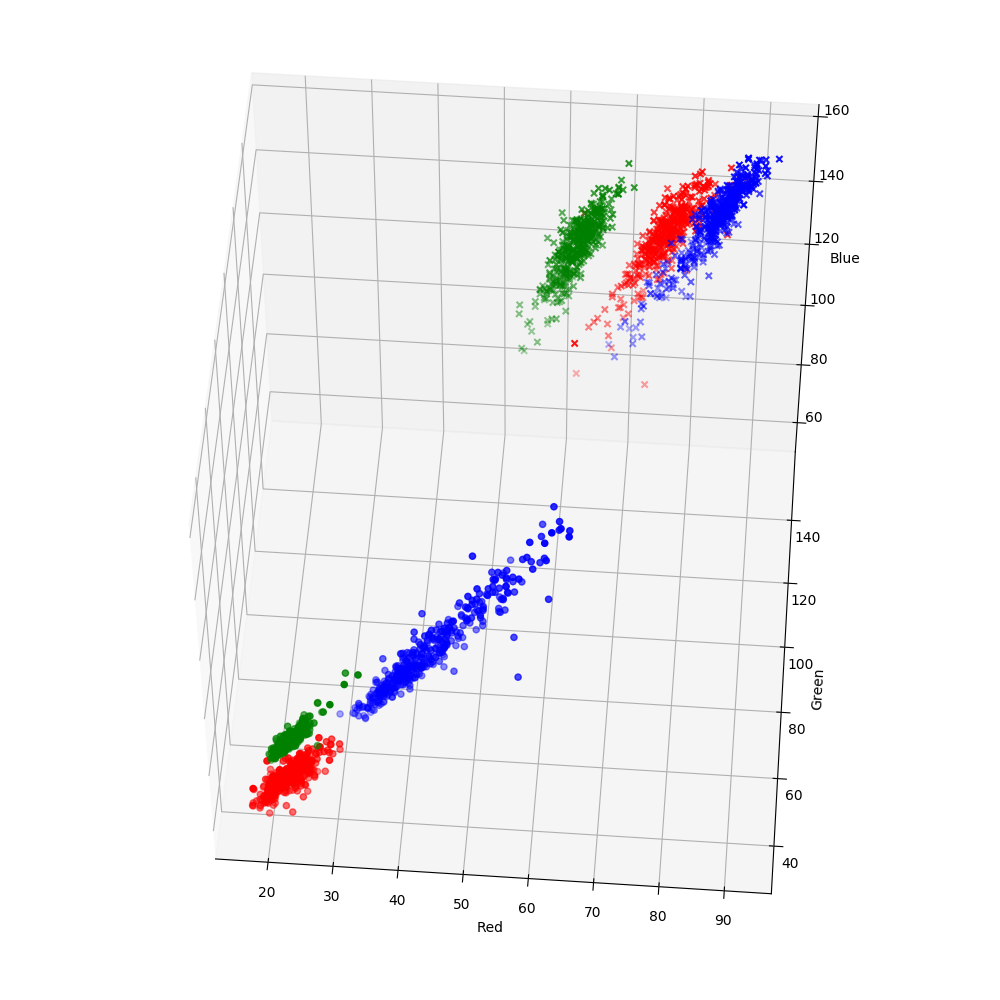

In [27]:
sg_ystart = 520
sg_xstart = 131
sg_ylen = 20
sg_xlen = 20

sed_ystart = 360
sed_xstart = 350
sed_ylen = 20
sed_xlen = 20

sample_sg_pts1 = Testimage1[sg_ystart:sg_ystart+sg_ylen,sg_xstart:sg_xstart+sg_xlen,:]
sample_sg_pts2 = Testimage2[sg_ystart:sg_ystart+sg_ylen,sg_xstart:sg_xstart+sg_xlen,:]
sample_sg_pts3 = Testimage3[sg_ystart:sg_ystart+sg_ylen,sg_xstart:sg_xstart+sg_xlen,:]
sample_sed_pts1 = Testimage1[sed_ystart:sed_ystart+sed_ylen,sed_xstart:sed_xstart+sed_xlen,:]
sample_sed_pts2 = Testimage2[sed_ystart:sed_ystart+sed_ylen,sed_xstart:sed_xstart+sed_xlen,:]
sample_sed_pts3 = Testimage3[sed_ystart:sed_ystart+sed_ylen,sed_xstart:sed_xstart+sed_xlen,:]

fig = plt.figure(3,figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(sample_sg_pts1[:,:,4].flatten(), sample_sg_pts1[:,:,2].flatten(), sample_sg_pts1[:,:,1].flatten(), c='r', marker='o')
ax.scatter(sample_sg_pts2[:,:,4].flatten(), sample_sg_pts2[:,:,2].flatten(), sample_sg_pts2[:,:,1].flatten(), c='b', marker='o')
ax.scatter(sample_sg_pts3[:,:,4].flatten(), sample_sg_pts3[:,:,2].flatten(), sample_sg_pts3[:,:,1].flatten(), c='g', marker='o')

ax.scatter(sample_sed_pts1[:,:,4].flatten(), sample_sed_pts1[:,:,2].flatten(), sample_sed_pts1[:,:,1].flatten(), c='r', marker='x')
ax.scatter(sample_sed_pts2[:,:,4].flatten(), sample_sed_pts2[:,:,2].flatten(), sample_sed_pts2[:,:,1].flatten(), c='b', marker='x')
ax.scatter(sample_sed_pts3[:,:,4].flatten(), sample_sed_pts3[:,:,2].flatten(), sample_sed_pts3[:,:,1].flatten(), c='g', marker='x')


ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()
                                  